In [8]:
import os
os.chdir('/Users/brentan/Documents/DAND/Week 13/ud120-projects/k_means')
os.getcwd()
os.listdir()

['k_means_cluster.py']

In [57]:
def featureScaling(arr):
    mn = min(arr)
    mx = max(arr)
    scaled = []
    for i in arr:
        scale = (i-mn) / (mx-mn)
        scaled.append(scale)
    return scaled


# tests of your feature scaler--line below is input data
data = [115, 140, 175]

featureScaling(data)



[0.0, 0.4166666666666667, 1.0]

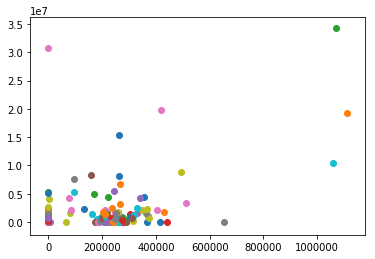

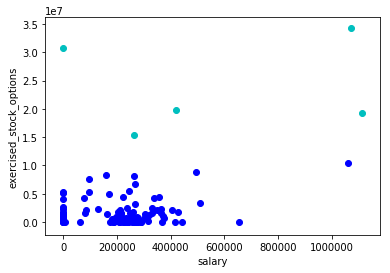

In [76]:
# #!/usr/bin/python 

# """ 
#     Skeleton code for k-means clustering mini-project.
# """
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
# feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

kmeans.fit(finance_features)

pred = kmeans.predict(finance_features)



### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")


In [94]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))

# scaler.fit(finance_features)
# print(scaler.data_max_)
# nw_ff = scaler.transform(finance_features)
# test = list([200000., 1000000.])
# test

finance_features

[array([ 365788.,       0.]),
 array([  267102.,  6680544.]),
 array([  170941.,  4890344.]),
 array([      0.,  651850.]),
 array([  243293.,  5538001.]),
 array([ 267093.,       0.]),
 array([      0.,  493489.]),
 array([  370448.,  1104054.]),
 array([ 374125.,  608750.]),
 array([ 197091.,  880290.]),
 array([  130724.,  2282768.]),
 array([ 248546.,  765313.]),
 array([ 257486.,       0.]),
 array([       0.,  2218275.]),
 array([      0.,  372205.]),
 array([ 288542.,       0.]),
 array([  251654.,  1056320.]),
 array([ 288558.,  185063.]),
 array([ 63744.,      0.]),
 array([       0.,  1030329.]),
 array([  357091.,  4346544.]),
 array([ 271442.,   81042.]),
 array([    0.,  3285.]),
 array([  304110.,  1441898.]),
 array([ 187922.,       0.]),
 array([  213625.,  1465734.]),
 array([  249201.,  1635238.]),
 array([     0.,  98718.]),
 array([ 231330.,       0.]),
 array([ 182245.,  601438.]),
 array([ 211788.,       0.]),
 array([      0.,  850477.]),
 array([ 224305.,       

In [50]:
# max_opt = 0
# min_opt = 100_000_000

# for employee in data_dict:
#     if (data_dict[employee]['salary'] != 'NaN'):
#         if data_dict[employee]['salary'] > max_opt:
#             max_opt = data_dict[employee]['salary'] 
#         elif data_dict[employee]['salary'] < min_opt:
#             min_opt = data_dict[employee]['salary']
# print("max", max_opt)
# print("min", min_opt)


max_opt = 0
min_opt = 100_000_000

for employee in data_dict:
    if (data_dict[employee]['salary'] != 'NaN'):
        if data_dict[employee]['salary'] > max_opt:
            max_opt = data_dict[employee]['salary'] 
        elif data_dict[employee]['salary'] < min_opt:
            min_opt = data_dict[employee]['salary']
print("max", max_opt)
print("min", min_opt)
            
       
            




max 1111258
min 477


In [33]:
import pandas as 

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'